# Regressão 01 - tarefa 03 - transformações em X e Y

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from seaborn import load_dataset

In [46]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [47]:
# 1 - Crie a matriz de design

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)

In [48]:
# 2 - Remova as variáveis não significantes.

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           2.64e-20
Time:                        18:16:23   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Analisando o p-value acima de 0.5, descartamos as variáveis sex e time, ficando apenas com smoker e net_bill

y, X = patsy.dmatrices('tip ~ smoker + net_bill', tips)

reg = sm.OLS(y, X).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           4.56e-22
Time:                        18:16:24   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: xlabel='net_bill', ylabel='tip_res'>

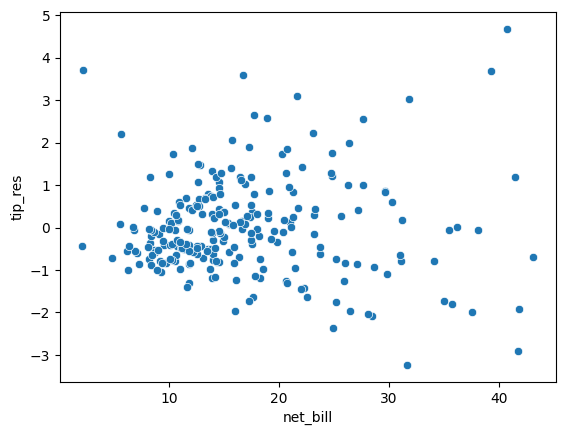

In [50]:
# 3 - observe o gráfico de resíduos em função de net_bill

tips['tip_res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'tip_res', data = tips)

- Analisando o gráficos dos resíduos, podemos verificar que o modelo está errando bastante, utilizando os valores reais sem nenhuma transformação

In [52]:
# teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

y, X = patsy.dmatrices('tip ~ smoker + np.log(net_bill)', tips)
reg_log = sm.OLS(y, X).fit()

y, X = patsy.dmatrices('tip ~ smoker + np.power(net_bill, 2)', tips)
reg_poli = sm.OLS(y, X).fit()

print(f'R2 modelo com log: {reg_log.rsquared}')
print(f'R2 modelo com polinômio: {reg_poli.rsquared}')

R2 modelo com log: 0.29467323673044776
R2 modelo com polinômio: 0.3042409962087359


Os modelos com log e polinômio praticamente empataram, sendo que o modelo com polinômio ficou com o R2 de 0.304

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [53]:
# 1 - Crie a matriz de design

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)

In [54]:
# 2 - Remova as variáveis não significantes.

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.21e-18
Time:                        18:27:27   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Analisando o p-value acima de 0.5, descartamos as variáveis sex e time, ficando apenas com smoker e net_bill

y, X = patsy.dmatrices('np.log(tip) ~ smoker + net_bill', tips)

reg = sm.OLS(y, X).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           2.31e-20
Time:                        18:28:02   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254      0.000       0.338       0.590
smoker[T.No]     0.0429      0.048      0.892      0.373      -0.052       0.138
net_bill         0.0305      0.003     10.475      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.966
Skew:                          -0.169   Prob(JB):                        0.374
Kurtosis:                       3.282   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: xlabel='net_bill', ylabel='tip_res'>

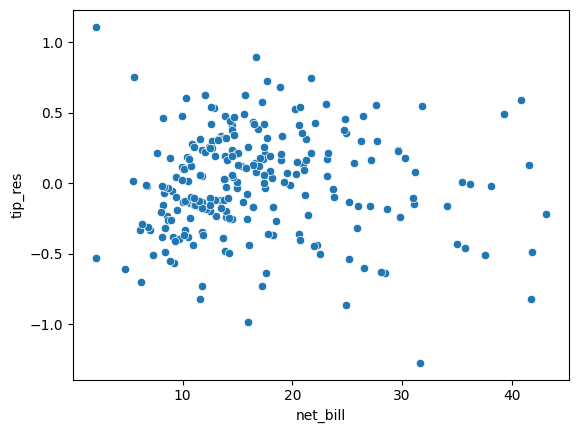

In [56]:
# 3 - observe o gráfico de resíduos em função de net_bill

tips['tip_res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'tip_res', data = tips)

- Analisando o gráficos dos resíduos com o log de `tip`, podemos considerar que a dispersão dos erros é aceitável

In [57]:
# teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

y, X = patsy.dmatrices('np.log(tip) ~ smoker + np.log(net_bill)', tips)
reg_log = sm.OLS(y, X).fit()

y, X = patsy.dmatrices('np.log(tip) ~ smoker + np.power(net_bill, 2)', tips)
reg_poli = sm.OLS(y, X).fit()

print(f'R2 modelo com log: {reg_log.rsquared}')
print(f'R2 modelo com polinômio: {reg_poli.rsquared}')

R2 modelo com log: 0.3194829035033744
R2 modelo com polinômio: 0.2529859189524678


Os modelos com log e polinômio, tentando explicar o log de `tip`, podemos verificar que o modelo com log ficou melhor, com o R2 de 32%

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [65]:
df = pd.read_csv('previsao_de_renda.csv', index_col=0)
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   index                  15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12466 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  mau                    15000 non-null  bool   
 14  renda                  15000 non-null  float64
dtypes:

In [71]:
# 1 - Regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa.

reg = smf.ols('renda ~ tempo_emprego', df).fit()

<AxesSubplot: xlabel='tempo_emprego'>

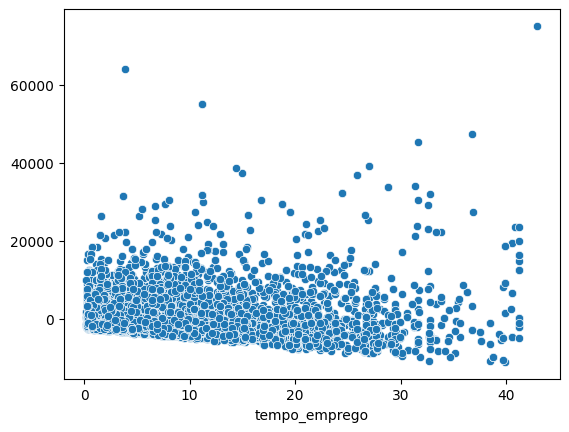

In [72]:
# 2 - Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

sns.scatterplot(x = df['tempo_emprego'], y = reg.resid)

A regressão pode ser melhorada colocando os valores na escala de log

In [80]:
# 3 - Regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis

reg = smf.ols('np.log(renda) ~ tipo_renda + qtd_filhos + educacao + estado_civil + idade + np.log(tempo_emprego)', df).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     114.0
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:10:00   Log-Likelihood:                -14127.
No. Observations:               12466   AIC:                         2.829e+04
Df Residuals:                   12450   BIC:                         2.841e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           7.3776      0.082     89.988      0.000       7.217       7.538
tipo_renda[T.Bolsista]             -0.2575      0.376     -0.684      0.494      -0.995       0.480
tipo_renda[T.Empresário]            0.1458      0.016      9.287      0.000       0.115       0.177
tipo_renda[T.Pensionista]           0.2941      0.251      1.172      0.241      -0.198       0.786
tipo_renda[T.Servidor público]      0.0819      0.023      3.611      0.000       0.037       0.126
educacao[T.Pós graduação]           0.4284      0.189      2.272      0.023       0.059       0.798
educacao[T.Secundário]             -0.0300      0.076     -0.393      0.694      -0.180       0.120
educacao[T.Superior completo]       0.0554      0.077      0.723      0.470      -0.095       0.205
educacao[T.Superior incompleto]    -0.0358      0.082     -0.437      0.662      -0.197       0.125
estado_civil[T.Separado]           -0.1190      0.030     -4.026      0.000      -0.177      -0.061
estado_civil[T.Solteiro]            0.0072      0.021      0.339      0.735      -0.035       0.049
estado_civil[T.União]              -0.0820      0.025     -3.288      0.001      -0.131      -0.033
estado_civil[T.Viúvo]              -0.2146      0.044     -4.921      0.000      -0.300      -0.129
qtd_filhos                          0.0318      0.009      3.553      0.000       0.014       0.049
idade                               0.0086      0.001     10.650      0.000       0.007       0.010
np.log(tempo_emprego)               0.2339      0.007     34.123      0.000       0.220       0.247
==============================================================================
Omnibus:                        6.085   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                6.096
Skew:                           0.045   Prob(JB):                       0.0474
Kurtosis:                       3.059   Cond. No.                     2.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
# 4 - Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

reg = smf.ols('np.log(renda) ~ tipo_renda + qtd_filhos + idade + np.log(tempo_emprego)', df).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     229.8
Date:                Fri, 09 Jun 2023   Prob (F-statistic):          1.24e-322
Time:                        19:14:58   Log-Likelihood:                -14172.
No. Observations:               12466   AIC:                         2.836e+04
Df Residuals:                   12458   BIC:                         2.842e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.3953      0.034    218.882      0.000       7.329       7.462
tipo_renda[T.Bolsista]            -0.1731      0.377     -0.459      0.647      -0.913       0.567
tipo_renda[T.Empresário]           0.1539      0.016      9.817      0.000       0.123       0.185
tipo_renda[T.Pensionista]          0.3555      0.252      1.413      0.158      -0.138       0.849
tipo_renda[T.Servidor público]     0.0943      0.023      4.165      0.000       0.050       0.139
qtd_filhos                         0.0333      0.009      3.793      0.000       0.016       0.051
idade                              0.0076      0.001      9.747      0.000       0.006       0.009
np.log(tempo_emprego)              0.2356      0.007     34.299      0.000       0.222       0.249
==============================================================================
Omnibus:                        6.173   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.151
Skew:                           0.049   Prob(JB):                       0.0462
Kurtosis:                       3.046   Cond. No.                     2.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

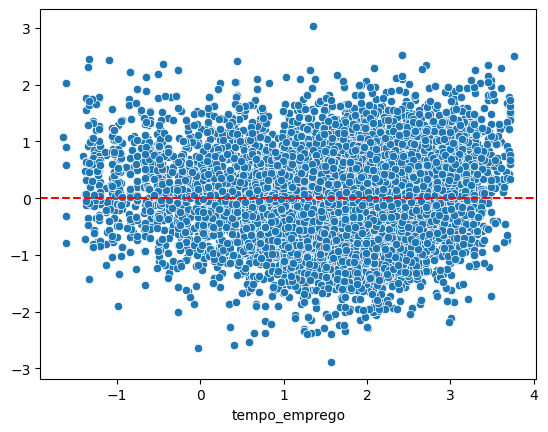

In [91]:
# 5 - Faça uma análise de resíduos. Avalie a qualidade do ajuste.

sns.scatterplot(x = np.log(df['tempo_emprego']), y = reg.resid)
plt.axhline(y=0, color='r', linestyle='--')

- Analisando o p-value da regressão no exercício 3, foram mantidas as varáveis `tipo_renda`, `qtd_filhos`, `idade` e `tempo_emprego`
- `renda` e `tempo_emprego` foram modeladas em log
- O r2 do modelo do exercício 3 e 4 tiveram leve variação
- A qualidade dos resíduos no exercício 4 ficou muito melhor em comparação com o modelo que não foi ajustado usando log